In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [167]:
df = pd.read_excel('Train_data.xlsx')

In [168]:
df.head()

,Pressure,Z,ρ (density)\n(g/cc),µg,Bg\n(RB/Mscf),Cg,m(p)
0,14.7,0.999689,0.000674,0.013708,234.674291,0.068116,1.576865e+04
1,100.0,0.992184,0.004619,0.013749,34.238131,0.010089,7.325434e+05
2,200.0,0.983623,0.009318,0.013822,16.971368,0.005087,2.936637e+06
3,300.0,0.975343,0.014096,0.013912,11.218999,0.003418,6.618632e+06
4,400.0,0.967364,0.018950,0.014017,8.345416,0.002582,1.177958e+07


In [169]:
X = df.drop('m(p)',axis=1).values
#Dropped the column containing the m(p), and the .values command converts the data frame to a numpy array of shape (no. of examples, no. of features)
Y = df['m(p)'].values
X = StandardScaler().fit_transform(X)

In [170]:
X

array([[-1.69062069e+00, -4.95642529e-02, -1.95505567e+00,
        -1.43517265e+00,  8.76359831e+00,  8.75374917e+00],
       [-1.65428875e+00, -1.17869345e-01, -1.91066647e+00,
        -1.42927004e+00,  1.11564017e+00,  1.13514887e+00],
       [-1.61169563e+00, -1.95775829e-01, -1.85779019e+00,
        -1.41895648e+00,  4.56799572e-01,  4.78470139e-01],
       [-1.56910250e+00, -2.71135650e-01, -1.80403101e+00,
        -1.40613991e+00,  2.37308852e-01,  2.59369862e-01],
       [-1.52650938e+00, -3.43750159e-01, -1.74941772e+00,
        -1.39123392e+00,  1.27662788e-01,  1.49642088e-01],
       [-1.48391625e+00, -4.13437501e-01, -1.69398610e+00,
        -1.37444334e+00,  6.19598488e-02,  8.36422970e-02],
       [-1.44132313e+00, -4.80032161e-01, -1.63777879e+00,
        -1.35588804e+00,  1.82324625e-02,  3.94901986e-02],
       [-1.39873000e+00, -5.43384509e-01, -1.58084502e+00,
        -1.33564526e+00, -1.29343723e-02,  7.80964266e-03],
       [-1.35613688e+00, -6.03360352e-01, -1.523

In [171]:
Y

array([1.57686527e+04, 7.32543360e+05, 2.93663735e+06, 6.61863238e+06,
       1.17795796e+07, 1.84155237e+07, 2.65178197e+07, 3.60733280e+07,
       4.70645738e+07, 5.94699092e+07, 7.32636938e+07, 8.84165030e+07,
       1.04895367e+08, 1.22664041e+08, 1.41683306e+08, 1.61911293e+08,
       1.83303833e+08, 2.05814814e+08, 2.29396561e+08, 2.54000204e+08,
       2.79576058e+08, 3.06073985e+08, 3.33443740e+08, 3.61635311e+08,
       3.90599219e+08, 4.20286805e+08, 4.50650479e+08, 4.81643941e+08,
       5.13222371e+08, 5.45342588e+08, 5.77963174e+08, 6.11044570e+08,
       6.44549146e+08, 6.78441236e+08, 7.12687162e+08, 7.47255222e+08,
       7.82115675e+08, 8.17240690e+08, 8.52604302e+08, 8.88182340e+08,
       9.23952358e+08, 9.59893552e+08, 9.95986673e+08, 1.03221394e+09,
       1.06855896e+09, 1.10500661e+09, 1.14154299e+09, 1.17815530e+09,
       1.21483176e+09, 1.25156156e+09, 1.28833475e+09, 1.32514218e+09,
       1.36197542e+09, 1.43568894e+09, 1.47255549e+09, 1.50942028e+09,
      

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X, Y, test_size=0.2)

In [174]:
import tensorflow as tf #imports the tensorflow api
from tensorflow.keras import Sequential #imports the Sequential model from tensorflow keras framework
from tensorflow.keras.layers import Dense #Dense command makes sure that the there is dense connection between the layers, i.e. each neuron is connected the each neuron on the next layer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop #Imports three neural network optimisers, SGD, i.e. stochastic gradient descent, the simplest of all, Adam and RMSprop

In [175]:
model = tf.keras.Sequential() 
model.add(Dense(10, activation=tf.nn.relu, input_shape=(6,)))
model.add(Dense(10, activation=tf.nn.relu))
model.add(Dense(5, activation=tf.nn.relu))
model.add(Dense(5, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.relu))

opt = Adam(learning_rate=0.8)
opt2=SGD(learning_rate=0.1)
opt3=RMSprop()

loss1='mse'
loss2='mean_squared_logarithmic_error'

model.compile(optimizer=opt, loss=loss1, metrics=['mae']) #mse stands for mean square error loss/cost function
hist = model.fit(X_Train,Y_Train, epochs=100) #storing the output of sequential model in a list named hist 

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 1531108149707145216.0000 - mae: 981052672.0000
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 1531096604835053568.0000 - mae: 981047360.0000
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 1530918346512400384.0000 - mae: 980976192.0000
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 1530036125870063616.0000 - mae: 980617536.0000
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 1526574176071057408.0000 - mae: 979282560.0000
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 1515854212578148352.0000 - mae: 975370240.0000
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 1490045513578315776.0000 - mae: 966370816.0000
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 1435063335119749120.0000 - mae: 947108096.0000
Epoch 9/100
2/2 [==============================] - 0s 99

2/2 [==============================] - 0s 1ms/step - loss: 704208340779008.0000 - mae: 20980464.0000
Epoch 72/100
2/2 [==============================] - 0s 1ms/step - loss: 697540135616512.0000 - mae: 21090176.0000
Epoch 73/100
2/2 [==============================] - 0s 1ms/step - loss: 689394864357376.0000 - mae: 21089044.0000
Epoch 74/100
2/2 [==============================] - 0s 1ms/step - loss: 679599788785664.0000 - mae: 20854180.0000
Epoch 75/100
2/2 [==============================] - 0s 1ms/step - loss: 668166988496896.0000 - mae: 20150744.0000
Epoch 76/100
2/2 [==============================] - 0s 1ms/step - loss: 660196602937344.0000 - mae: 20062516.0000
Epoch 77/100
2/2 [==============================] - 0s 1ms/step - loss: 648580863885312.0000 - mae: 20022216.0000
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 640020255866880.0000 - mae: 20048236.0000
Epoch 79/100
2/2 [==============================] - 0s 1ms/step - loss: 639099723579392.0000 - mae: 2

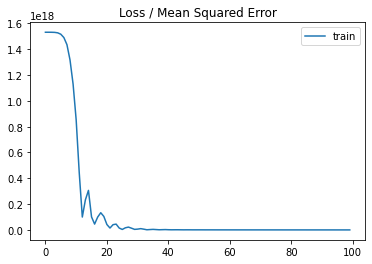

In [176]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.legend()

In [177]:
from sklearn.metrics import r2_score
M=model.predict(X_Train)
N=model.predict(X_Test)

In [178]:
print(r2_score(Y_Train, M))

0.99915054025145


In [179]:
print(r2_score(Y_Test,N))

0.9993876785131464


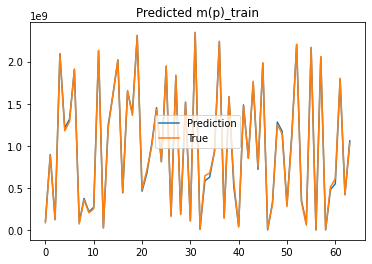

In [182]:
plt.title('Predicted m(p)_train')
plt.plot(M, label='Prediction')
plt.plot(Y_Train, label='True')
plt.legend()

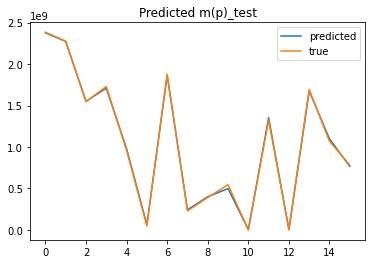

In [183]:
plt.title('Predicted m(p)_test')
plt.plot(N, label='predicted')
plt.plot(Y_Test, label='true')
plt.legend()